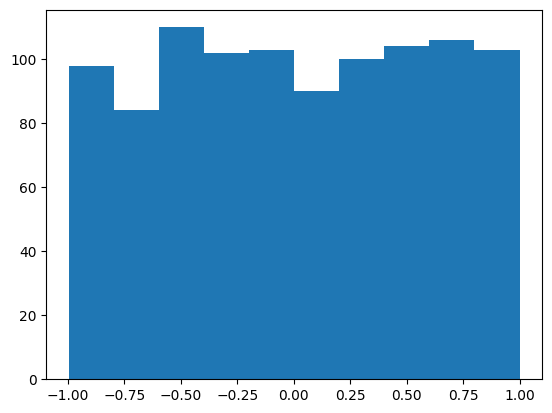

In [1]:
from samplers import get_data_sampler, UniformSampler

set_of_xs = []
data_sampler = UniformSampler(1)
data = data_sampler.sample_xs(1, 1000, 1).squeeze().squeeze()
import matplotlib.pyplot as plt

plt.hist(data)
plt.show()

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

torch.Size([100000, 10, 1])
tensor([[-5.7855e-02,  1.9871e-04, -2.2660e-03],
        [ 9.9564e-01, -4.8654e-02,  2.3078e-01]])
torch.Size([100000, 10])
torch.Size([1000000])


KeyboardInterrupt: 

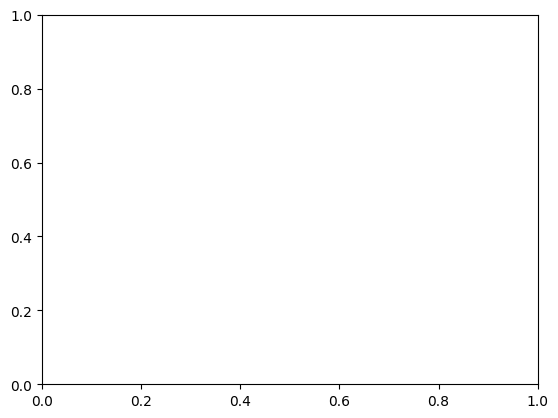

In [4]:
from tasks import PolynomialSharedRoots, ChebyshevKernelLinearRegression
data =  data_sampler.sample_xs(10, 100000, 1)
task = PolynomialSharedRoots(n_dims=1, batch_size=100000, perturbation=0.5, basis_dim=1, degree=5)
#task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=100000, basis_dim=5,lowest_degree=5, highest_degree=5)
print(data.shape)
ys = task.evaluate(data).squeeze()
print(ys[:2,:3])
print(ys.shape)
ys = ys.reshape(-1)
print(ys.shape)
plt.hist(ys, bins=30)
plt.show()

torch.Size([1000000, 20, 1])


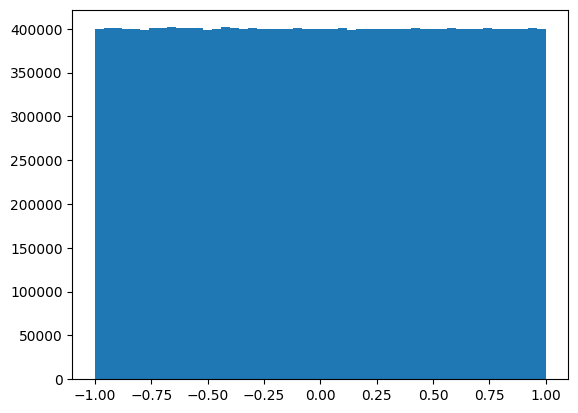

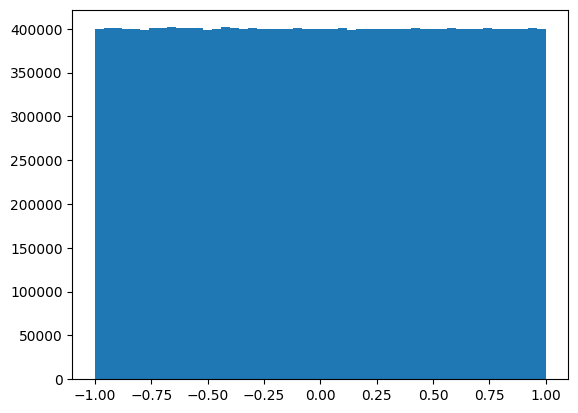

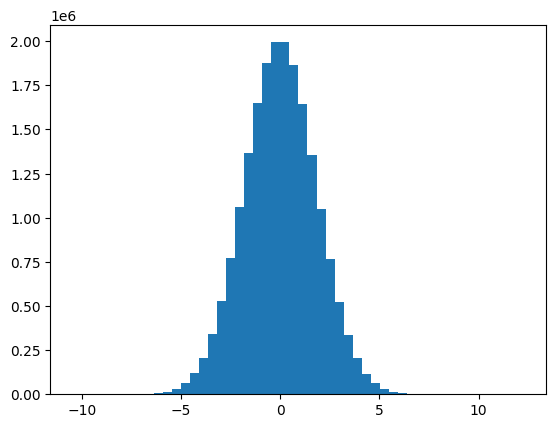

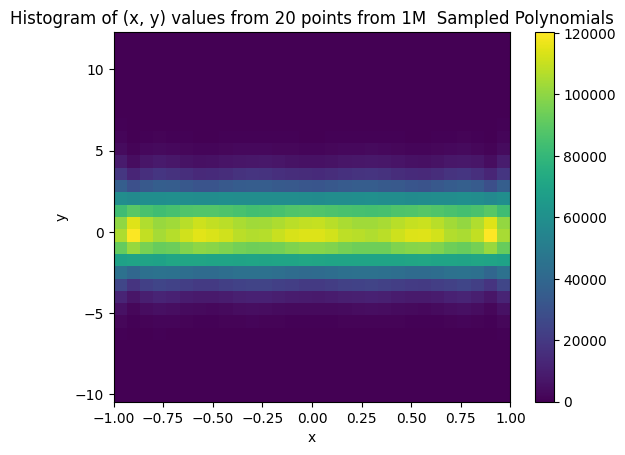

INFORMATION GAIN:  0.006198786928414399


In [4]:
import numpy as np
from npeet import entropy_estimators as ee
def mutual_information(data, ys):
    # Sort ys according to data
    return ee.mi(data, ys)
from tasks import get_task_sampler, ChebyshevKernelLinearRegression
data =  data_sampler.sample_xs(20, 1000000, 1)
#task = PolynomialSharedRoots(n_dims=1, batch_size=1000000, basis_dim=1, degree=5, perturbation=0.1)
import torch
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1000000, basis_dim=5,lowest_degree=5, highest_degree=5, fixed_coeffs=0, scale=1.0, different_degrees=False)
print(data.shape)
ys = task.evaluate(data).squeeze()
ys = ys.reshape(-1)
data = data.reshape(-1)
plt.hist(data, bins=50)
plt.show()
data = data.numpy()
ys = ys.numpy()
plt.hist(data, bins=50)
plt.show()
plt.hist(ys, bins=50)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
counts,xedges,yedges,img = ax.hist2d(data,ys, bins=[30,30])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram of (x, y) values from 20 points from 1M  Sampled Polynomials")
plt.xlim([-1, 1])
plt.colorbar(img)
plt.show()
print("INFORMATION GAIN: ", mutual_information(data, ys))
print("ENTROPY OF Y: ", ee.entropy(ys[:, None]))